# **Tutorial 1**

## Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [3]:
data = pd.read_csv('Salary_Data.csv')
print(data.info())
round(data.describe(),2)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
None


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
x = data[['YearsExperience']]
y = data['Salary']

x.shape       #dimensions

(30, 1)

Visualizing the data

Text(0, 0.5, 'Salary')

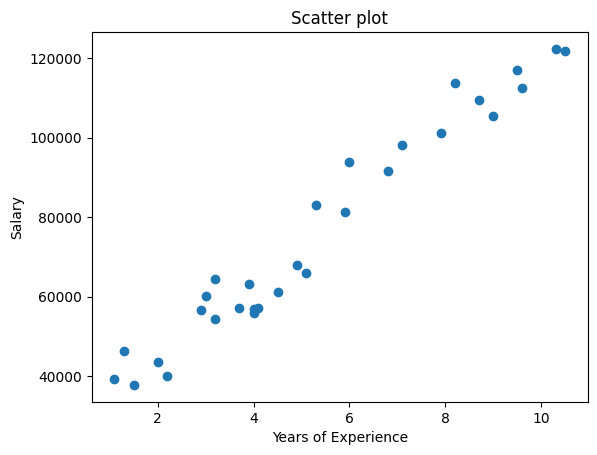

In [5]:
plt.scatter(x,y);
plt.title('Scatter plot')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

 Splitting the data into test and train

`random_state`: This parameter controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls.

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=1/4, random_state=0)

In [7]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

Intercept and Coefficient

In [8]:
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

Intercept:  26986.691316737248
Coefficient:  [9379.71049195]


In [9]:
ypred = model.predict(xtest)

In [11]:
#Actual and predicted values Dataframe.
model_df = pd.DataFrame({'Actual value': np.array(ytest), 'Predicted value': ypred.reshape(-1)})
model_df
# ytest.reshape(-1)

,Actual value,Predicted value
0,37731.0,41056.257055
1,122391.0,123597.709384
2,57081.0,65443.504334
3,63218.0,63567.562235
4,116969.0,116093.940990
5,109431.0,108590.172597
6,112635.0,117031.912039
7,55794.0,64505.533285


Visualizing the training and test results

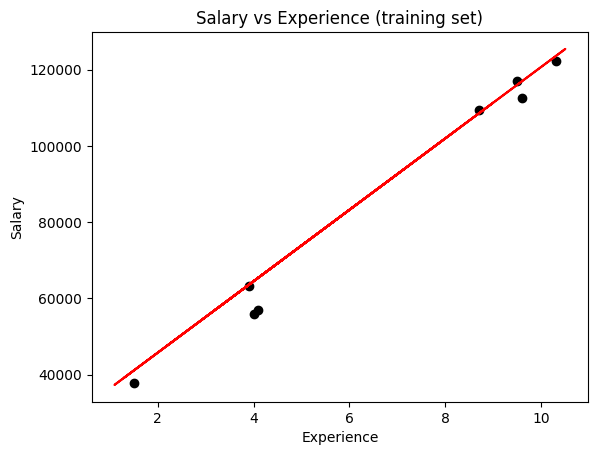

In [12]:
plt.scatter(xtest, ytest, color = 'black')
plt.plot(xtrain, model.predict(xtrain),color='red')
plt.title('Salary vs Experience (training set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

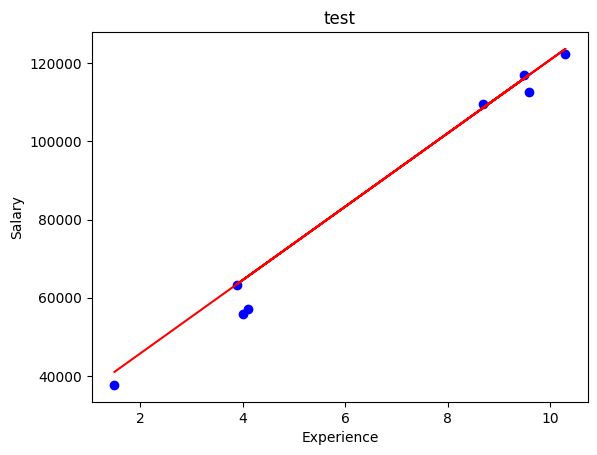

In [ ]:
plt.scatter(xtest, ytest, color='blue')     # b;ue = actual values ; Red =  predicted values
plt.plot(xtest, ypred, color = 'red')
plt.title('test')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

Model Evaluation

In [13]:
MAE = metrics.mean_absolute_error(ytest, ypred)
MSE = metrics.mean_squared_error(ytest, ypred)
RMSE = np.sqrt(metrics.mean_squared_error(ytest, ypred))
print('R squared: {:.2f}'.format(model.score(x,y)))
print('Mean Absolute Error:', MAE)
print('Mean Square Error:', MSE)
print('Root Mean Square Error:', RMSE)

R squared: 0.96
Mean Absolute Error: 3508.5455930660555
Mean Square Error: 22407940.143340684
Root Mean Square Error: 4733.70258289858


Multivariate Linear Regression

In [ ]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('Salary_Data_3.csv')

Saving Salary_Data_3.csv to Salary_Data_3.csv


In [ ]:
data.head()

,YearsExperience,Salary,Age
0,1.1,39343,24
1,1.3,46205,25
2,1.5,37731,25
3,2.0,43525,24
4,2.2,39891,26


In [ ]:
x = data[['YearsExperience', 'Age']]
y = data['Salary']

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [ ]:
model2 = LinearRegression()
model2.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
print("Intercept: ", model2.intercept_)
print("Coefficients:", model2.coef_)

Intercept:  9083.563079079686
Coefficients: [9007.29250981  699.29925393]


In [ ]:
ypred = model2.predict(xtest)
ypred

array([ 61291.62522163, 117729.71730217, 125634.85056395,  65593.84147949,
        53386.49195985,  64693.11222851, 118630.44655315, 112526.77179333,
        54287.22121083])

In [ ]:
model2_df = pd.DataFrame({'Actual value': ytest, 'Predicted value': ypred})
model2_df.head()

,Actual value,Predicted value
9,57189,61291.625222
26,116969,117729.717302
28,122391,125634.850564
13,57081,65593.841479
5,56642,53386.491960


Evaluation of model

In [ ]:
MAE = metrics.mean_absolute_error(ytest, ypred)
MSE = metrics.mean_squared_error(ytest, ypred)
RMSE = np.sqrt(metrics.mean_squared_error(ytest, ypred))
print('R squared: {:.2f}'.format(model2.score(x,y)*100))
print('Mean Absolute Error:', MAE)
print('Mean Square Error:', MSE)
print('Root Mean Square Error:', RMSE)

R squared: 95.44
Mean Absolute Error: 5157.183552395712
Mean Square Error: 32154937.31496764
Root Mean Square Error: 5670.532366098234


In [ ]:
## HW: Write the code to visualize the data

## Polynomial Regression

In [ ]:
dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values


In [ ]:
poly_reg = PolynomialFeatures(degree=2)
Xpol = poly_reg.fit_transform(X)
model3= LinearRegression()
model3.fit(Xpol,y)

LinearRegression()

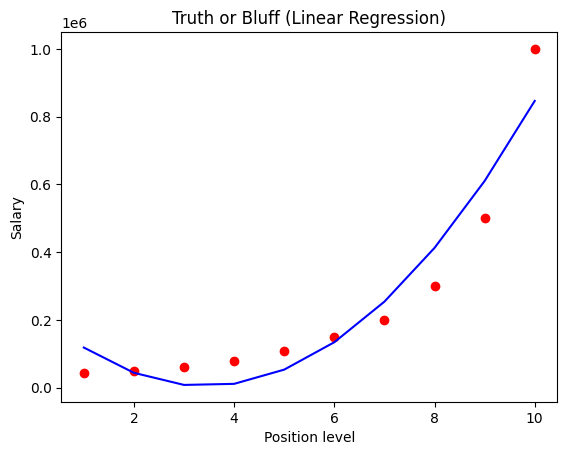

In [ ]:
plt.scatter(X, y, color='red')
plt.plot(X, model3.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
# HW: plot and check the difference for higher degrees.

In [ ]:
X.shape

(10, 1)

In [ ]:
y_pred = model3.predict(poly_reg.fit_transform(X))

In [ ]:
MAE = metrics.mean_absolute_error(y, y_pred)
MSE = metrics.mean_squared_error(y, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y, y_pred))
print('Mean Absolute Error:', MAE)
print('Mean Square Error:', MSE)
print('Root Mean Square Error:', RMSE)

Mean Absolute Error: 70218.1818181819
Mean Square Error: 6758833333.333338
Root Mean Square Error: 82212.12400451249


In [ ]:
# References
# https://medium.com/machine-learning-with-python/linear-regression-implementation-in-python-2de514d3a34e
# https://medium.com/machine-learning-with-python/multiple-linear-regression-implementation-in-python-2de9b303fc0c
# https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386